# Install SDK Data Prep
The Azure Machine Learning Data Prep SDK is used to load, transform, and write data for machine learning workflows. You can interact with the SDK in any Python environment, including Jupyter Notebooks or your favorite Python IDE. To install the SDK, use the following command

Documentation: https://github.com/Microsoft/AMLDataPrepDocs

In [1]:
!pip install --upgrade azureml-dataprep[pandas]

Requirement already up-to-date: azureml-dataprep[pandas] in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (1.1.2)


In [2]:
import pandas as pd
import azureml.dataprep as dprep

# Auto Read File
Data Prep has the ability to load different kinds of text files. The auto_read_file entry point can take any text based file (including excel, json and parquet) and auto-detect how to parse the file. It will also attempt to auto-detect the types of each column and apply type transformations to the columns it detects.

In [70]:
dflow_auto = dprep.auto_read_file('crime-full.csv')
df = dflow_auto.head(5)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Damage Cost,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1098554,HZ239907,4/4/2016 13:56,007XX E 111TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,FALSE,False,...,50,11,1183356,1831503,2016,5/11/2016 15:48,,41.69283384,-87.60431945,"(41.692833841, -87.60431945)"
1,1056598,HZ258664,4/15/2016 17:00,082XX S MARSHFIELD AVE,890,THEFT,FROM BUILDING,RESIDENCE,FALSE,False,...,71,6,1166776,1850053,2016,5/12/2016 15:48,,41.74410697,-87.66449429,"(41.744106973, -87.664494285)"
2,1053196,HZ261252,4/15/2016 10:00,104XX S SACRAMENTO AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,FALSE,False,...,74,11,,,2016,5/12/2016 15:50,,,,
3,1051991,HZ261534,4/15/2016 9:00,113XX S PRAIRIE AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,FALSE,False,...,49,10,,,2016,5/13/2016 15:51,,,,
4,1534446,HZ277630,4/15/2016 10:00,055XX N KEDZIE AVE,890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",FALSE,False,...,13,6,,,2016,5/25/2016 15:59,,,,


# Derive Column By Example
One of the more advanced tools in DataPrep is the ability to derive columns by providing examples of desired results and letting DataPrep generate code to achieve the intended derivation. Let's assume that we need to be able to join this with a dataset where date and time come in a format 'Mar 10, 2018 | 2AM-4AM'. Let's wrangle the data into the shape we need. First, let's take a look at the formats

In [71]:
dflow_auto.get_profile()

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent Missing,Error Count,Empty Count,Unique Values,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
ID,FieldType.INTEGER,20991,1.01449e+07,1010.0,0.0,1010.0,0.0,0.0,0.0,,538166,1.98911e+06,1.96382e+06,3.23202e+06,5.38479e+06,7.83147e+06,9.53076e+06,1.00183e+07,1.01358e+07,5.49606e+06,2.58819e+06,6.69872e+12,0.0621612,-1.2218
Case Number,FieldType.STRING,G024689,HZ278872,1010.0,0.0,1010.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
Date,FieldType.STRING,1/1/2007 14:47,9/9/2011 8:20,1010.0,0.0,1010.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
Block,FieldType.STRING,0000X E 103RD PL,134XX S VERNON AVE,1010.0,0.0,1010.0,0.0,0.0,0.0,966,,,,,,,,,,,,,,
IUCR,FieldType.STRING,031A,930,1010.0,0.0,1010.0,0.0,0.0,0.0,107,,,,,,,,,,,,,,
Primary Type,FieldType.STRING,ASSAULT,WEAPONS VIOLATION,1010.0,0.0,1010.0,0.0,0.0,0.0,20,,,,,,,,,,,,,,
Description,FieldType.STRING,$500 AND UNDER,VIOLATE ORDER OF PROTECTION,1010.0,0.0,1010.0,0.0,0.0,0.0,101,,,,,,,,,,,,,,
Location Description,FieldType.STRING,,WAREHOUSE,1010.0,0.0,1010.0,0.0,0.0,1.0,52,,,,,,,,,,,,,,
Damage Cost,FieldType.STRING,1004,FALSE,1010.0,0.0,1010.0,0.0,0.0,0.0,910,,,,,,,,,,,,,,
Arrest,FieldType.BOOLEAN,False,True,1010.0,0.0,1010.0,0.0,0.0,0.0,2,,,,,,,,,,,,,,


In [72]:
dflow_auto = dflow_auto.to_string("Date")
builder = dflow_auto.builders.derive_column_by_example(source_columns=["Date"], new_column_name="new_Date")
builder.add_example(source_data = df.iloc[2], example_value = 'April 15, 2016 10AM-11AM') #2016-04-04 13:56:00
builder.preview()

,Date,new_Date
0,4/4/2016 13:56,"April 4, 2016 1PM-2PM"
1,4/15/2016 17:00,"April 15, 2016 5PM-6PM"
2,4/15/2016 10:00,"April 15, 2016 10AM-11AM"
3,4/15/2016 9:00,"April 15, 2016 9AM-10AM"
4,4/15/2016 10:00,"April 15, 2016 10AM-11AM"
5,4/15/2016 4:30,"April 15, 2016 4AM-5AM"
6,4/15/2016 10:00,"April 15, 2016 10AM-11AM"
7,4/15/2016 16:00,"April 15, 2016 4PM-5PM"
8,4/15/2016 8:00,"April 15, 2016 8AM-9AM"
9,4/15/2016 15:00,"April 15, 2016 3PM-4PM"


Here we can see an issue with the generated program: based solely on 1 example we provided above, the derive program chose to parse the date as "Day/Month/Year", which is not what we want in this case.

However, as you can see times are reported with a single digit when time is smaller than 12. Let's fix it to show 01AM instead of 1AM

In [78]:
builder.add_example(source_data=df.iloc[0], example_value='April 4, 2016 01PM-02PM')
builder.preview(count=20)

,Date,new_Date
0,4/17/2005 20:50,"April 17, 2005 08PM-09PM"
1,8/2/2010 12:45,"August 2, 2010 12PM-01PM"
2,4/24/2006 0:00,"April 24, 2006 12AM-01AM"
3,4/29/2005 8:30,"April 29, 2005 08AM-09AM"
4,7/30/2002 13:30,"July 30, 2002 01PM-02PM"
5,11/7/2001 21:45,"November 7, 2001 09PM-10PM"
6,11/11/2001 3:30,"November 11, 2001 03AM-04AM"
7,3/3/2003 20:48,"March 3, 2003 08PM-09PM"
8,4/24/2001 9:00,"April 24, 2001 09AM-10AM"
9,4/19/2005 16:00,"April 19, 2005 04PM-05PM"


We can also use the option skip to have a look at specific parts of the dataset

In [74]:
preview_df = builder.preview(skip=50, count=20)
preview_df

,Date,new_Date
0,8/8/2003 22:00,"August 8, 2003 10PM-11PM"
1,12/26/2011 9:00,"December 26, 2011 09AM-10AM"
2,8/11/2004 11:00,"August 11, 2004 11AM-12PM"
3,10/23/2008 18:10,"October 23, 2008 06PM-07PM"
4,7/11/2004 19:46,"July 11, 2004 07PM-08PM"
5,9/8/2013 14:30,"September 8, 2013 02PM-03PM"
6,11/28/2006 7:45,"November 28, 2006 07AM-08AM"
7,11/15/2009 13:15,"November 15, 2009 01PM-02PM"
8,9/23/2011 18:15,"September 23, 2011 06PM-07PM"
9,8/26/2009 18:00,"August 26, 2009 06PM-07PM"


It seems that there is a None. This means that the SDK was not able to infer what's the value for this input. Let's fix it

In [75]:
builder.generate_suggested_examples()

,Date
0,5/29/2009T22:00:00Z
1,4/26/2003 0:00


In [69]:
builder.add_example(source_data=preview_df.iloc[16], example_value='May 29, 2009 10PM-11PM')
builder.preview(skip=50, count=20)

,Date,new_Date
0,8/8/2003 22:00,"August 8, 2003 10PM-11PM"
1,12/26/2011 9:00,"December 26, 2011 09AM-10AM"
2,8/11/2004 11:00,"August 11, 2004 11AM-12PM"
3,10/23/2008 18:10,"October 23, 2008 06PM-07PM"
4,7/11/2004 19:46,"July 11, 2004 07PM-08PM"
5,9/8/2013 14:30,"September 8, 2013 02PM-03PM"
6,11/28/2006 7:45,"November 28, 2006 07AM-08AM"
7,11/15/2009 13:15,"November 15, 2009 01PM-02PM"
8,9/23/2011 18:15,"September 23, 2011 06PM-07PM"
9,8/26/2009 18:00,"August 26, 2009 06PM-07PM"


Now this looks correct and we can finally call to_dataflow() on the builder, which would return a dataflow with the desired derived columns added.

In [79]:
dflow = builder.to_dataflow()
df = dflow.to_pandas_dataframe()
df

,ID,Case Number,Date,new_Date,Block,IUCR,Primary Type,Description,Location Description,Damage Cost,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1098554,HZ239907,4/4/2016 13:56,"April 4, 2016 01PM-02PM",007XX E 111TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,FALSE,...,50,11,1183356,1831503,2016,5/11/2016 15:48,,41.69283384,-87.60431945,"(41.692833841, -87.60431945)"
1,1056598,HZ258664,4/15/2016 17:00,"April 15, 2016 05PM-06PM",082XX S MARSHFIELD AVE,890,THEFT,FROM BUILDING,RESIDENCE,FALSE,...,71,6,1166776,1850053,2016,5/12/2016 15:48,,41.74410697,-87.66449429,"(41.744106973, -87.664494285)"
2,1053196,HZ261252,4/15/2016 10:00,"April 15, 2016 10AM-11AM",104XX S SACRAMENTO AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,FALSE,...,74,11,,,2016,5/12/2016 15:50,,,,
3,1051991,HZ261534,4/15/2016 9:00,"April 15, 2016 09AM-10AM",113XX S PRAIRIE AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,FALSE,...,49,10,,,2016,5/13/2016 15:51,,,,
4,1534446,HZ277630,4/15/2016 10:00,"April 15, 2016 10AM-11AM",055XX N KEDZIE AVE,890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",FALSE,...,13,6,,,2016,5/25/2016 15:59,,,,
5,1035059,HZ278872,4/15/2016 4:30,"April 15, 2016 04AM-05AM",004XX S KILBOURN AVE,810,THEFT,OVER $500,RESIDENCE,FALSE,...,26,6,,,2016,5/25/2016 15:59,,,,
6,1049802,HZ240778,4/15/2016 10:00,"April 15, 2016 10AM-11AM",010XX N MILWAUKEE AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,FALSE,...,24,11,,,2016,5/27/2016 15:45,,,,
7,1052293,HZ264802,4/15/2016 16:00,"April 15, 2016 04PM-05PM",019XX W DIVISION ST,1110,DECEPTIVE PRACTICE,BOGUS CHECK,RESTAURANT,FALSE,...,24,11,1163094,1908003,2016,5/16/2016 15:48,,41.90320604,-87.67636193,"(41.903206037, -87.676361925)"
8,1052311,HZ265911,4/15/2016 8:00,"April 15, 2016 08AM-09AM",061XX N SHERIDAN RD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,FALSE,...,77,11,,,2016,5/16/2016 15:50,,,,
9,1052587,HZ268138,4/15/2016 15:00,"April 15, 2016 03PM-04PM",023XX W EASTWOOD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,,FALSE,...,4,11,,,2016,5/18/2016 15:50,,,,


Now, we can save the processing steps into a pkg file which can be loaded later on

In [ ]:
pack = dprep.Package(dflow)
pack.save(".\datrepr.pkg")

In [20]:
dflow = dprep.auto_read_file(path='inspections.json')
dflow.head(5)

,inspections.business.business_id,inspections.business.name,inspections.business.address,inspections.business.city,inspections.business.postal_code,inspections.business.latitude,inspections.business.longitude,inspections.business.phone_number,inspections.business.TaxCode,inspections.business.business_certificate,inspections.business.application_date,inspections.business.owner_name,inspections.business.owner_address,inspections.Score,inspections.date,inspections.type,inspections.violations
0,16162.0,Quick-N-Ezee Indian Foods,3861 24th St,SF,94114.0,NaN,NaN,None,H34,467114.0,May 9 2005 12:00AM,Jagpreet Enterprises,23682 Clawiter Road\n Hayward\n CA\n 94545,100.0,20130223.0,Routine - Unscheduled,[]
1,69707.0,Little Green Cyclo 2,Off The Grid,,NaN,NaN,NaN,None,H79,453248.0,Jul 12 2012 12:00AM,LITTLEGREENCYCLO LLC,"100 Esplanade Ave., Apt. 99\n Pacifica\n CA\n ...",93.0,20130224.0,Routine - Unscheduled,"[{""description"":""103112: No hot water or runni..."
2,67565.0,King of Thai Noodles Cafe,1541 TARAVAL St,SAN FRANCISCO,94116.0,37.7427,-122.483,None,H25,NaN,Oct 12 2011 12:00AM,"Royal Thai Noodles, Inc",2410 19th Ave\n SF\n CA\n 94116,79.0,20130225.0,Routine - Unscheduled,"[{""description"":""103139: Improper food storage..."
3,67565.0,King of Thai Noodles Cafe,1541 TARAVAL St,SAN FRANCISCO,94116.0,37.7427,-122.483,None,H25,NaN,Oct 12 2011 12:00AM,"Royal Thai Noodles, Inc",2410 19th Ave\n SF\n CA\n 94116,NaN,20130225.0,Complaint,"[{""description"":""103139: Improper food storage..."
4,68701.0,Grindz,832 Clement St,SF,94118.0,37.7828,-122.468,None,H25,467498.0,Mar 16 2012 12:00AM,"Ono Grindz, LLC",1055 Granada St.\n Vallejo\n CA\n 94591,100.0,20130225.0,Routine - Unscheduled,[]


As you can see above, the column inspections.business.city contains several forms of the city name "San Francisco". Let's add a column with values replaced by the automatically detected canonical form. To do so call fuzzy_group_column() on an existing Dataflow:

In [21]:
dflow_clean = dflow.fuzzy_group_column(source_column='inspections.business.city',
                                       new_column_name='city_grouped',
                                       similarity_threshold=0.8,
                                       similarity_score_column_name='similarity_score')
dflow_clean.head(5)

,inspections.business.business_id,inspections.business.name,inspections.business.address,inspections.business.city,city_grouped,similarity_score,inspections.business.postal_code,inspections.business.latitude,inspections.business.longitude,inspections.business.phone_number,inspections.business.TaxCode,inspections.business.business_certificate,inspections.business.application_date,inspections.business.owner_name,inspections.business.owner_address,inspections.Score,inspections.date,inspections.type,inspections.violations
0,16162.0,Quick-N-Ezee Indian Foods,3861 24th St,SF,San Francisco,0.814806,94114.0,NaN,NaN,None,H34,467114.0,May 9 2005 12:00AM,Jagpreet Enterprises,23682 Clawiter Road\n Hayward\n CA\n 94545,100.0,20130223.0,Routine - Unscheduled,[]
1,69707.0,Little Green Cyclo 2,Off The Grid,,,NaN,NaN,NaN,NaN,None,H79,453248.0,Jul 12 2012 12:00AM,LITTLEGREENCYCLO LLC,"100 Esplanade Ave., Apt. 99\n Pacifica\n CA\n ...",93.0,20130224.0,Routine - Unscheduled,"[{""description"":""103112: No hot water or runni..."
2,67565.0,King of Thai Noodles Cafe,1541 TARAVAL St,SAN FRANCISCO,San Francisco,1.000000,94116.0,37.7427,-122.483,None,H25,NaN,Oct 12 2011 12:00AM,"Royal Thai Noodles, Inc",2410 19th Ave\n SF\n CA\n 94116,79.0,20130225.0,Routine - Unscheduled,"[{""description"":""103139: Improper food storage..."
3,67565.0,King of Thai Noodles Cafe,1541 TARAVAL St,SAN FRANCISCO,San Francisco,1.000000,94116.0,37.7427,-122.483,None,H25,NaN,Oct 12 2011 12:00AM,"Royal Thai Noodles, Inc",2410 19th Ave\n SF\n CA\n 94116,NaN,20130225.0,Complaint,"[{""description"":""103139: Improper food storage..."
4,68701.0,Grindz,832 Clement St,SF,San Francisco,0.814806,94118.0,37.7828,-122.468,None,H25,467498.0,Mar 16 2012 12:00AM,"Ono Grindz, LLC",1055 Granada St.\n Vallejo\n CA\n 94591,100.0,20130225.0,Routine - Unscheduled,[]


But what if you want more control over what gets grouped, what doesn't, and what the canonical value should be?

To get more control over grouping, canonical values, and exceptions, you need to use the FuzzyGroupBuilder class. Let's see what it has to offer below:

In [23]:
builder = dflow.builders.fuzzy_group_column(source_column='inspections.business.city',
                                            new_column_name='city_grouped',
                                            similarity_threshold=0.8,
                                            similarity_score_column_name='similarity_score')


# calling learn() to get fuzzy groups
builder.learn()
builder.groups

[{'canonicalValue': 'San Francisco',
  'duplicates': [{'similarityScore': 1.0,
    'duplicateValue': 'San Francisco',
    'useForReplacement': True},
   {'similarityScore': 1.0,
    'duplicateValue': 'SAN FRANCISCO',
    'useForReplacement': True},
   {'similarityScore': 0.8148061037063599,
    'duplicateValue': 'SF',
    'useForReplacement': True},
   {'similarityScore': 0.8148061037063599,
    'duplicateValue': 'S.F.',
    'useForReplacement': True}]}]

In [25]:
builder.groups["canonicalValue"] = "SAN FRANCISCO"

dflow_clean = builder.to_dataflow()

df = dflow_clean.to_pandas_dataframe()

# Descriptive statistics

In [27]:
profile = dflow_clean.get_profile()
profile

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent missing,Error Count,Empty count,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
inspections.business.business_id,FieldType.DECIMAL,475,71769,58.0,0.0,58.0,0.000000,0.0,0.0,475,1309.4,1259,3373,17628,65051,70530,71750.2,71769,29463.7,29069.8,8.45051e+08,0.428205,-1.65138
inspections.business.name,FieldType.STRING,3RD BAPTIST FELLOWSHIP HALL,XTRA OIL CORP,58.0,0.0,58.0,0.000000,0.0,0.0,,,,,,,,,,,,,,
inspections.business.address,FieldType.STRING,Off The Grid,950 Clay St,58.0,0.0,58.0,0.000000,0.0,0.0,,,,,,,,,,,,,,
inspections.business.city,FieldType.STRING,,San Francisco,58.0,0.0,58.0,0.000000,0.0,1.0,,,,,,,,,,,,,,
city_grouped,FieldType.STRING,,San Francisco,58.0,0.0,58.0,0.000000,0.0,1.0,,,,,,,,,,,,,,
similarity_score,FieldType.DECIMAL,0.814806,1,58.0,1.0,57.0,0.017241,0.0,0.0,0.814806,0.814806,0.814806,0.814806,1,1,1,1,1,0.909028,0.0934057,0.00872462,-0.0341737,-2.03359
inspections.business.postal_code,FieldType.DECIMAL,94102,94133,58.0,1.0,57.0,0.017241,0.0,0.0,94102,94102,94102,94107,94114,94118,94129.9,94133,94133,94112.7,7.86386,61.8402,0.666325,0.18195
inspections.business.latitude,FieldType.DECIMAL,37.7363,37.8035,58.0,7.0,51.0,0.120690,0.0,0.0,37.7363,37.7436,37.7432,37.7629,37.7837,37.7868,37.8,37.8035,37.8035,37.7766,0.0178474,0.000318531,-0.776256,-0.418022
inspections.business.longitude,FieldType.DECIMAL,-122.501,-122.388,58.0,7.0,51.0,0.120690,0.0,0.0,-122.501,-122.461,-122.468,-122.442,-122.42,-122.409,-122.39,-122.388,-122.388,-122.426,0.0254102,0.000645681,-0.885836,0.352592
inspections.business.phone_number,FieldType.DECIMAL,1.41553e+10,1.41559e+10,58.0,44.0,14.0,0.758621,0.0,0.0,1.41553e+10,1.41553e+10,1.41553e+10,1.41555e+10,1.41556e+10,1.41557e+10,1.41559e+10,1.41559e+10,1.41559e+10,1.41556e+10,178863,3.19919e+10,-0.169238,-1.12103


In [41]:
profile.columns["inspections.Score"].histogram

[HistogramBucket(lower_bound=65.0, upper_bound=68.5, count=0.75),
 HistogramBucket(lower_bound=68.5, upper_bound=72.0, count=0.25),
 HistogramBucket(lower_bound=72.0, upper_bound=75.5, count=0.25),
 HistogramBucket(lower_bound=75.5, upper_bound=79.0, count=0.25),
 HistogramBucket(lower_bound=79.0, upper_bound=82.5, count=0.875),
 HistogramBucket(lower_bound=82.5, upper_bound=86.0, count=3.125),
 HistogramBucket(lower_bound=86.0, upper_bound=89.5, count=3.75),
 HistogramBucket(lower_bound=89.5, upper_bound=93.0, count=4.25),
 HistogramBucket(lower_bound=93.0, upper_bound=96.5, count=4.25),
 HistogramBucket(lower_bound=96.5, upper_bound=100.0, count=12.25)]

In [44]:
counts = profile.columns["inspections.Score"].value_counts
counts

[ValueCountEntry(value=None, count=28),
 ValueCountEntry(value=100.0, count=8),
 ValueCountEntry(value=98.0, count=4),
 ValueCountEntry(value=90.0, count=3),
 ValueCountEntry(value=96.0, count=3),
 ValueCountEntry(value=87.0, count=2),
 ValueCountEntry(value=93.0, count=1),
 ValueCountEntry(value=79.0, count=1),
 ValueCountEntry(value=65.0, count=1),
 ValueCountEntry(value=86.0, count=1),
 ValueCountEntry(value=83.0, count=1),
 ValueCountEntry(value=84.0, count=1),
 ValueCountEntry(value=88.0, count=1),
 ValueCountEntry(value=85.0, count=1),
 ValueCountEntry(value=94.0, count=1),
 ValueCountEntry(value=91.0, count=1)]

In [32]:
import matplotlib.pyplot as plt

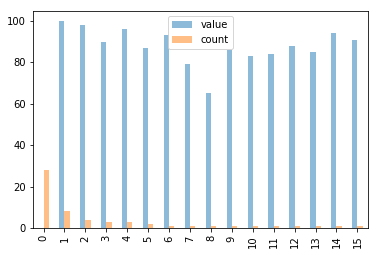

In [45]:
df = pd.DataFrame(counts)
df.plot.bar(alpha=0.5)